<a href="https://colab.research.google.com/github/river6907/Data-Mining/blob/main/worldcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving alice.txt to alice.txt
Saving alice_color.png to alice_color.png
Saving alice_mask.png to alice_mask.png
Saving constitution.txt to constitution.txt
Saving news.json to news.json
Saving ratings.txt to ratings.txt
Saving ratings_test.txt to ratings_test.txt
Saving ratings_train.txt to ratings_train.txt


# wordcloud
* 가장 활용도 높은 텍스트 데이터 시각화 기법
* 문서에 사용된 단어의 중요도 또는 인기도를 시각적으로 표현하는 기법
* 출현 빈도가 큰 단어는 크게, 작은 단어는 작게 표시하여 문서에서 가장 많이 
* 언급되고 따라서 핵심이 되는 내용을 파악할 수 있음
* 활용 사례 및 예제 : https://amueller.github.io/word_cloud/index.html#

In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = open('constitution.txt').read()
wordcloud = WordCloud().generate(text)
wordcloud.words_

{'Act': 0.07575757575757576,
 'Adjournment': 0.045454545454545456,
 'Ambassadors public': 0.06060606060606061,
 'Amendment': 0.06060606060606061,
 'America': 0.045454545454545456,
 'Appointment': 0.06060606060606061,
 'Article': 0.13636363636363635,
 'Attainder': 0.045454545454545456,
 'Authority': 0.10606060606060606,
 'Ballot': 0.045454545454545456,
 'Bill': 0.15151515151515152,
 'Case': 0.2878787878787879,
 'Citizen': 0.16666666666666666,
 'Class': 0.045454545454545456,
 'Coin': 0.07575757575757576,
 'Compensation': 0.045454545454545456,
 'Concurrence': 0.045454545454545456,
 'Congress': 0.4393939393939394,
 'Consent': 0.06060606060606061,
 'Consequence': 0.045454545454545456,
 'Constitution': 0.21212121212121213,
 'Convention': 0.06060606060606061,
 'Court': 0.06060606060606061,
 'Credit': 0.045454545454545456,
 'Crime': 0.07575757575757576,
 'Day': 0.12121212121212122,
 'Debts': 0.045454545454545456,
 'Department': 0.045454545454545456,
 'Duties': 0.06060606060606061,
 'Duties Imp

##  1. simple

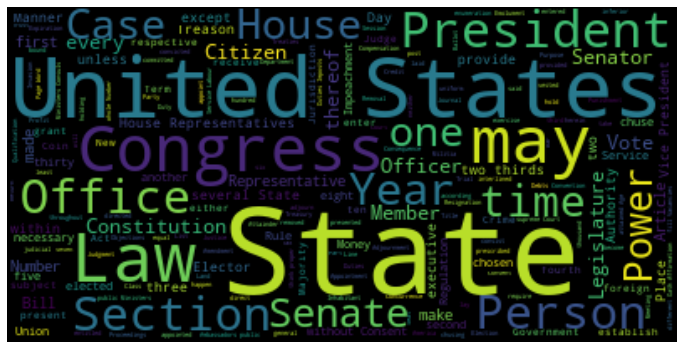

In [14]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear') # interpolation 인자 설정값은 matplotlib 홈페이지 확인
plt.axis('off')
plt.show()

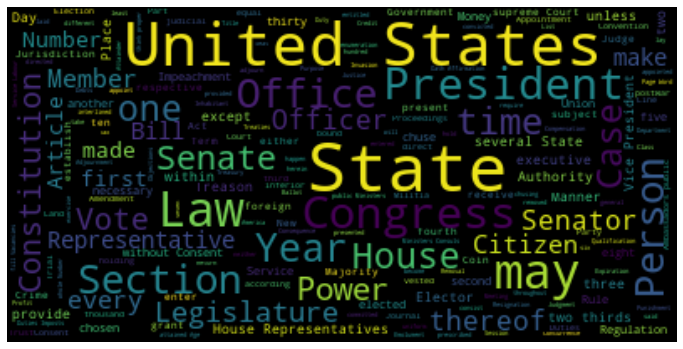

In [15]:
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. masked

In [16]:
# 이미지 처리를 위한 패키지, 불용어 처리를 위한 패키지, 마스킹 이미지 불러오기
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS ## 불용어
alice_mask = np.array(Image.open('alice_mask.png')) ## masking image
text = open('alice.txt').read()
stopwords = set(STOPWORDS) ## 불용어 처리
stopwords.add('said') ## 불용어에 'said' 추가
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

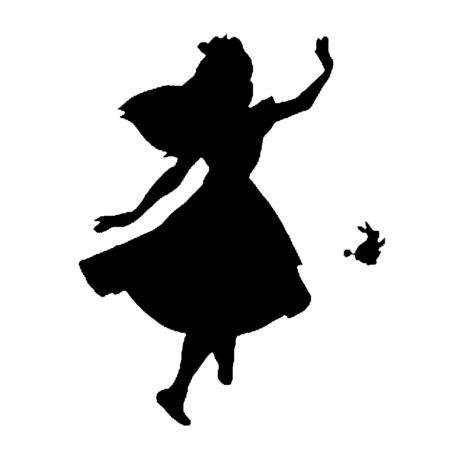

In [17]:
# 마스킹 이미지 흑백 처리
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# 단어 빈도수 계산
wc = WordCloud(background_color='white',
max_words=2000,
mask=alice_mask,
stopwords=stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

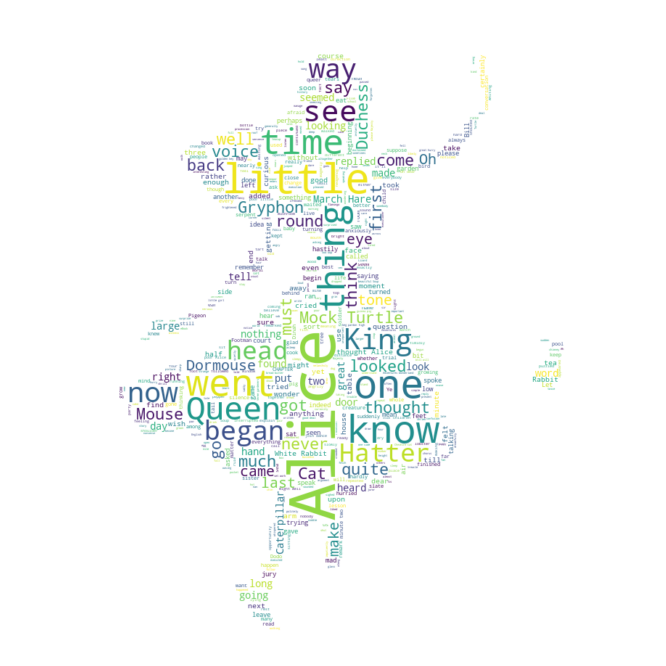

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3. Image-colored wordcloud 
* 마스킹 이미지의 컬러를 사용한 wordcloud

In [20]:
from wordcloud import ImageColorGenerator
alice_coloring = np.array(Image.open('alice_color.png'))
image_colors = ImageColorGenerator(alice_coloring)
wc = WordCloud(background_color='white',
max_words=2000,
mask=alice_coloring,
stopwords=stopwords,
max_font_size=40,
random_state=42)
wc.generate(text)

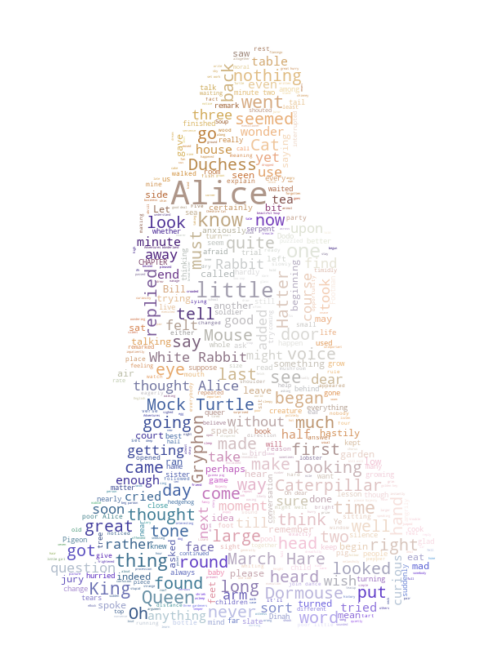

In [21]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()